In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.legend_handler as HandlerLine2D
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import svm, datasets
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import import_ipynb
from wines import *
import scipy.sparse as sparse
from graphviz import Source
from sklearn import tree
from IPython.display import Image

In [ ]:
# DEFINING THE TRAINING AND TEST DATASET

In [13]:
wqp_features = wines.iloc[:,:-3]
wqp_class_labels = np.array(wines['quality'])
wqp_label_names = list(map(lambda x: str(x), wines['quality'].unique()))
wqp_feature_names = list(wqp_features.columns)
wqp_categories = list(wqp_features.columns.values)
wqp_train_X, wqp_test_X, wqp_train_y, wqp_test_y = train_test_split(wqp_features,
wqp_class_labels, test_size=0.3, random_state=42)
print(Counter(wqp_train_y), Counter(wqp_test_y))
print('Features:', wqp_feature_names)

Counter({6: 1981, 5: 1497, 7: 767, 4: 141, 8: 137, 3: 21, 9: 3}) Counter({6: 855, 5: 641, 7: 312, 4: 75, 8: 56, 3: 9, 9: 2})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [ ]:
# SCALING THE TRAIN AND TEST DATASETS

In [14]:
# Define the scaler
wqp_ss = StandardScaler().fit(wqp_train_X)
# Scale the train set
wqp_train_SX = wqp_ss.transform(wqp_train_X)
# Scale the test set
wqp_test_SX = wqp_ss.transform(wqp_test_X)

In [ ]:
#training the set
wtp_lr = LogisticRegression()
wtp_lr.fit(wtp_train_SX, wtp_train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
verbose=0, warm_start=False)

In [ ]:
# DECISION TREE ALGORITHM

In [156]:
weight = [{1:1}, {2:5}, {3:1}, {4:1}]
wqp_dt = DecisionTreeClassifier(random_state=42, criterion="entropy", splitter="best", class_weight="balanced")
wqp_dt.fit(wqp_train_SX, wqp_train_y)

# predict and evaluate performance
wqp_dt_predictions = wqp_dt.predict(wqp_test_SX)

print(classification_report(wqp_test_y,wqp_dt_predictions, target_names=wqp_label_names))
print(accuracy_score(wqp_test_y,wqp_dt_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.18      0.13      0.15        75
           5       0.65      0.63      0.64       641
           6       0.62      0.65      0.63       855
           7       0.50      0.49      0.50       312
           8       0.36      0.43      0.39        56
           9       0.00      0.00      0.00         2

    accuracy                           0.59      1950
   macro avg       0.33      0.33      0.33      1950
weighted avg       0.58      0.59      0.58      1950

0.5871794871794872


In [ ]:
# CHECKING THE FEATURES IMPORTANCE

array([0.07829662, 0.10644738, 0.06638635, 0.09314992, 0.07744146,
       0.09085295, 0.09159625, 0.09099956, 0.07886915, 0.08345148,
       0.14250887])

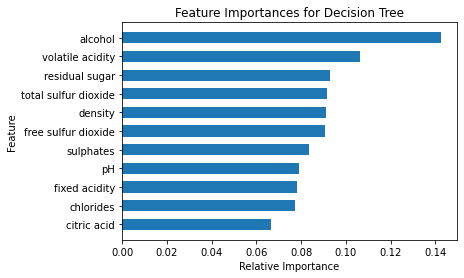

In [7]:
wqp_dt_feature_importances = wqp_dt.feature_importances_
wqp_dt_feature_names, wqp_dt_feature_scores = zip(*sorted(zip(wqp_feature_names,
wqp_dt_feature_importances), key=lambda x: x[1]))
y_position = list(range(len(wqp_dt_feature_names)))
plt.barh(y_position, wqp_dt_feature_scores, height=0.6, align='center')
plt.yticks(y_position , wqp_dt_feature_names)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Decision Tree')
wqp_dt_feature_importances

In [ ]:
# RANDOM FOREST ALGORITHM

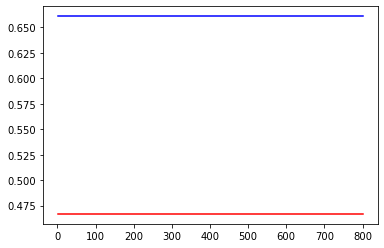

In [193]:
# FINDING OUT BEST PARAMETERS FOR MODEL
parameters = [None, 2, 5, 15, 30, 80, 150, 200, 400, 800]
accuracy_result = []
kappa_result = []

for parameter in parameters:
    rf = RandomForestClassifier(random_state=42, n_estimators=80, criterion="entropy", bootstrap=True, max_depth=30, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=800)
    rf.fit(wqp_train_SX, wqp_train_y)
    rf_predictions = rf.predict(wqp_test_SX)
    accuracy_result.append(accuracy_score(wqp_test_y,rf_predictions))
    kappa_result.append(cohen_kappa_score(wqp_test_y, rf_predictions))
line1 = plt.plot(parameters, accuracy_result, "b", label="accuracy")
line2 = plt.plot(parameters, kappa_result, "r", label="kappa")
# plt.legend(handler_map=HandlerLine2D(numpoints=2))
plt.show()

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       1.00      0.05      0.10        75
           5       0.70      0.68      0.69       641
           6       0.63      0.78      0.69       855
           7       0.69      0.52      0.59       312
           8       0.95      0.38      0.54        56
           9       0.00      0.00      0.00         2

    accuracy                           0.66      1950
   macro avg       0.57      0.34      0.37      1950
weighted avg       0.68      0.66      0.64      1950

accuracy 0.661025641025641
kappa 0.2646833757607603
[[  0   0   5   3   1   0   0]
 [  0   4  43  28   0   0   0]
 [  0   0 438 200   3   0   0]
 [  0   0 138 664  52   1   0]
 [  0   0   5 145 162   0   0]
 [  0   0   0  20  15  21   0]
 [  0   0   0   1   1   0   0]]


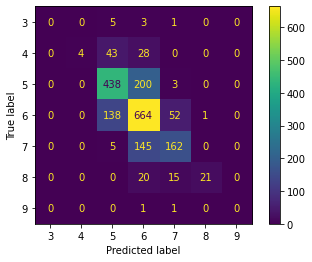

In [194]:
# USING BEST PARAMETERS
# train the model
wqp_rf = RandomForestClassifier(random_state=42, n_estimators=80, criterion="entropy", bootstrap=True, max_depth=30, oob_score=True, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=800)
wqp_rf.fit(wqp_train_SX, wqp_train_y)
# predict and evaluate performance
wqp_rf_predictions = wqp_rf.predict(wqp_test_SX)
print(classification_report(wqp_test_y,wqp_rf_predictions, target_names=wqp_label_names))
print("accuracy", accuracy_score(wqp_test_y,wqp_rf_predictions))
wqp_confusion_matrix = confusion_matrix(wqp_test_y,wqp_rf_predictions)
print("kappa", cohen_kappa_score(wqp_test_y, wqp_lr_predictions))
print(wqp_confusion_matrix)
cm_display = ConfusionMatrixDisplay(wqp_confusion_matrix, display_labels=wqp_label_names).plot()



array([0.07250303, 0.10609579, 0.07801884, 0.08113468, 0.08486703,
       0.08779346, 0.08903192, 0.10265885, 0.07872879, 0.08248569,
       0.13668192])

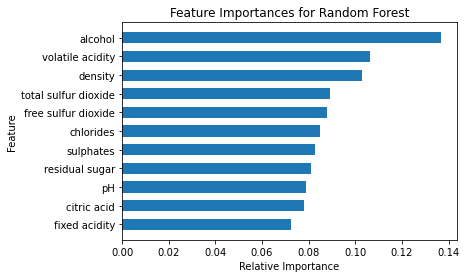

In [195]:
wqp_rf_feature_importances = wqp_rf.feature_importances_
wqp_rf_feature_names, wqp_rf_feature_scores = zip(*sorted(zip(wqp_feature_names,
wqp_rf_feature_importances), key=lambda x: x[1]))
y_position = list(range(len(wqp_rf_feature_names)))
plt.barh(y_position, wqp_rf_feature_scores, height=0.6, align='center')
plt.yticks(y_position , wqp_rf_feature_names)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Random Forest')
wqp_rf_feature_importances

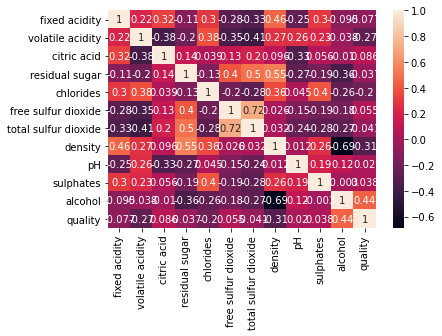

<Figure size 1080x1080 with 0 Axes>

In [205]:
corr_matrix = wines.corr()
sns.heatmap(corr_matrix, annot=True)
plt.figure(figsize=(15, 15))
plt.show()

In [220]:
# FEATURE ENGINEERING
wqp_features = wines.loc[:,["alcohol", "volatile acidity", "density", "total sulfur dioxide", "chlorides", "sulphates"]]
wqp_class_labels = np.array(wines['quality'])
wqp_label_names = list(map(lambda x: str(x), wines['quality'].unique()))
wqp_feature_names = list(wqp_features.columns)
wqp_categories = list(wqp_features.columns.values)
wqp_train_X, wqp_test_X, wqp_train_y, wqp_test_y = train_test_split(wqp_features,
wqp_class_labels, test_size=0.3, random_state=42)
print(Counter(wqp_train_y), Counter(wqp_test_y))
print('Features:', wqp_feature_names)
# Define the scaler
wqp_ss = StandardScaler().fit(wqp_train_X)
# Scale the train set
wqp_train_SX = wqp_ss.transform(wqp_train_X)
# Scale the test set
wqp_test_SX = wqp_ss.transform(wqp_test_X)

Counter({6: 1981, 5: 1497, 7: 767, 4: 141, 8: 137, 3: 21, 9: 3}) Counter({6: 855, 5: 641, 7: 312, 4: 75, 8: 56, 3: 9, 9: 2})
Features: ['alcohol', 'volatile acidity', 'density', 'total sulfur dioxide', 'chlorides', 'sulphates']


In [221]:
# train the model
wqp_rf = RandomForestClassifier(random_state=42, n_estimators=80, criterion="entropy", bootstrap=True, max_depth=30, oob_score=True, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=800)
wqp_rf.fit(wqp_train_SX, wqp_train_y)
# predict and evaluate performance
wqp_rf_predictions = wqp_rf.predict(wqp_test_SX)
print(classification_report(wqp_test_y,wqp_rf_predictions, target_names=wqp_label_names))
print("accuracy", accuracy_score(wqp_test_y,wqp_rf_predictions))
print("kappa", cohen_kappa_score(wqp_test_y, wqp_rf_predictions))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.25      0.03      0.05        75
           5       0.69      0.66      0.68       641
           6       0.62      0.76      0.68       855
           7       0.68      0.52      0.59       312
           8       0.75      0.38      0.50        56
           9       0.00      0.00      0.00         2

    accuracy                           0.65      1950
   macro avg       0.43      0.34      0.36      1950
weighted avg       0.64      0.65      0.63      1950

accuracy 0.6482051282051282
kappa 0.4483267726683178


In [ ]:
# KNN ALGORITHM

In [22]:
wqp_knn = KNeighborsClassifier(n_neighbors=7)
wqp_knn.fit(wqp_train_SX, wqp_train_y)
#testing the set
wqp_knn_predictions = wqp_knn.predict(wqp_test_SX)
print(classification_report(wqp_test_y,wqp_knn_predictions, target_names=wqp_label_names))
print(accuracy_score(wqp_test_y,wqp_knn_predictions))
print(cohen_kappa_score(wqp_test_y, wqp_knn_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.27      0.05      0.09        75
           5       0.58      0.61      0.60       641
           6       0.57      0.64      0.60       855
           7       0.46      0.42      0.44       312
           8       0.38      0.09      0.14        56
           9       0.00      0.00      0.00         2

    accuracy                           0.55      1950
   macro avg       0.32      0.26      0.27      1950
weighted avg       0.53      0.55      0.54      1950

0.5523076923076923
0.3073683782244283


In [23]:
# SUPPORT VECTOR MACHINE ALGORITHM

In [94]:
wqp_svm = svm.SVC()
wqp_svm.fit(wqp_train_SX, wqp_train_y)
wqp_svm_predictions = wqp_svm.predict(wqp_test_SX)
print(classification_report(wqp_test_y,wqp_svm_predictions, target_names=wqp_label_names))
print(accuracy_score(wqp_test_y,wqp_svm_predictions))
print(cohen_kappa_score(wqp_test_y, wqp_svm_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        75
           5       0.63      0.64      0.63       641
           6       0.55      0.75      0.63       855
           7       0.62      0.25      0.36       312
           8       0.00      0.00      0.00        56
           9       0.00      0.00      0.00         2

    accuracy                           0.58      1950
   macro avg       0.26      0.23      0.23      1950
weighted avg       0.55      0.58      0.54      1950

0.5784615384615385
0.31596320565699154


In [ ]:
# LINEAR REGRESSION ALGORITHM

In [140]:
#training the set
wqp_lr = LogisticRegression()
wqp_lr.fit(wqp_train_SX, wqp_train_y)
LogisticRegression(C=1.0, class_weight="balanced", dual=False, fit_intercept=True,
intercept_scaling=1, max_iter=100, multi_class='multinomial', n_jobs=1,
penalty='l2', random_state=42, solver='lbfgs', tol=0.0001,
verbose=0, warm_start=False)
wqp_lr_predictions = wqp_lr.predict(wqp_test_SX)
print(classification_report(wqp_test_y,wqp_lr_predictions, target_names=wqp_label_names))
print(accuracy_score(wqp_test_y,wqp_lr_predictions))
wqp_confusion_matrix = confusion_matrix(wqp_test_y,wqp_lr_predictions)
print(wqp_confusion_matrix)
print(cohen_kappa_score(wqp_test_y, wqp_lr_predictions))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       1.00      0.01      0.03        75
           5       0.59      0.59      0.59       641
           6       0.53      0.71      0.60       855
           7       0.51      0.24      0.32       312
           8       0.00      0.00      0.00        56
           9       0.00      0.00      0.00         2

    accuracy                           0.55      1950
   macro avg       0.38      0.22      0.22      1950
weighted avg       0.54      0.55      0.51      1950

0.5451282051282051
[[  0   0   4   5   0   0   0]
 [  0   1  40  34   0   0   0]
 [  0   0 379 257   5   0   0]
 [  0   0 196 609  50   0   0]
 [  0   0  20 218  74   0   0]
 [  0   0   6  37  13   0   0]
 [  0   0   0   0   2   0   0]]
0.2646833757607603


In [248]:
# FEATURE ENGINEERING
wqp_features = wines.iloc[:,:-3]
wqp_class_labels = np.array(wines['quality_label'])
wqp_label_names = list(map(lambda x: str(x), wines['quality_label'].unique()))
wqp_feature_names = list(wqp_features.columns)
wqp_categories = list(wqp_features.columns.values)
wqp_train_X, wqp_test_X, wqp_train_y, wqp_test_y = train_test_split(wqp_features,
wqp_class_labels, test_size=0.2, random_state=42)
print(Counter(wqp_train_y), Counter(wqp_test_y))
print('Features:', wqp_feature_names)
# Define the scaler
wqp_ss = StandardScaler().fit(wqp_train_X)
# Scale the train set
wqp_train_SX = wqp_ss.transform(wqp_train_X)
# Scale the test set
wqp_test_SX = wqp_ss.transform(wqp_test_X)

Counter({'medium': 3134, 'low': 1897, 'high': 166}) Counter({'medium': 781, 'low': 487, 'high': 32})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [249]:
# train the model
wqp_rf = RandomForestClassifier(random_state=42, n_estimators=80, criterion="gini", bootstrap=True, max_depth=30, oob_score=True, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=800)
wqp_rf.fit(wqp_train_SX, wqp_train_y)
# predict and evaluate performance
wqp_rf_predictions = wqp_rf.predict(wqp_test_SX)
print(classification_report(wqp_test_y,wqp_rf_predictions, target_names=wqp_label_names))
print("accuracy", accuracy_score(wqp_test_y,wqp_rf_predictions))
print("kappa", cohen_kappa_score(wqp_test_y, wqp_rf_predictions))

              precision    recall  f1-score   support

         low       1.00      0.47      0.64        32
      medium       0.79      0.68      0.73       487
        high       0.80      0.88      0.84       781

    accuracy                           0.80      1300
   macro avg       0.86      0.68      0.74      1300
weighted avg       0.80      0.80      0.80      1300

accuracy 0.7992307692307692
kappa 0.5812646474070619


array([0.06850357, 0.11056527, 0.07454023, 0.08233364, 0.08222468,
       0.08436238, 0.08563091, 0.10847168, 0.07318978, 0.08392856,
       0.14624931])

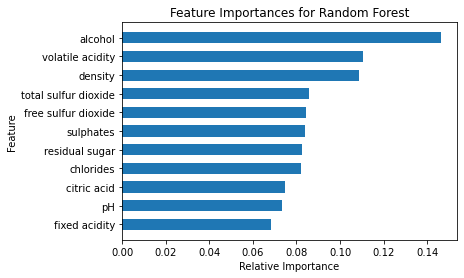

In [227]:
wqp_rf_feature_importances = wqp_rf.feature_importances_
wqp_rf_feature_names, wqp_rf_feature_scores = zip(*sorted(zip(wqp_feature_names,
wqp_rf_feature_importances), key=lambda x: x[1]))
y_position = list(range(len(wqp_rf_feature_names)))
plt.barh(y_position, wqp_rf_feature_scores, height=0.6, align='center')
plt.yticks(y_position , wqp_rf_feature_names)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Random Forest')
wqp_rf_feature_importances

In [232]:
wqp_features = wines.loc[:,["alcohol", "volatile acidity", "density", "total sulfur dioxide", "chlorides", "sulphates"]]
wqp_class_labels = np.array(wines['quality_label'])
wqp_label_names = list(map(lambda x: str(x), wines['quality_label'].unique()))
wqp_feature_names = list(wqp_features.columns)
wqp_categories = list(wqp_features.columns.values)
wqp_train_X, wqp_test_X, wqp_train_y, wqp_test_y = train_test_split(wqp_features,
wqp_class_labels, test_size=0.3, random_state=42)
print(Counter(wqp_train_y), Counter(wqp_test_y))
print('Features:', wqp_feature_names)
# Define the scaler
wqp_ss = StandardScaler().fit(wqp_train_X)
# Scale the train set
wqp_train_SX = wqp_ss.transform(wqp_train_X)
# Scale the test set
wqp_test_SX = wqp_ss.transform(wqp_test_X)

Counter({'medium': 2748, 'low': 1659, 'high': 140}) Counter({'medium': 1167, 'low': 725, 'high': 58})
Features: ['alcohol', 'volatile acidity', 'density', 'total sulfur dioxide', 'chlorides', 'sulphates']


In [247]:
# train the model
wqp_rf = RandomForestClassifier(random_state=42, n_estimators=80, criterion="entropy", bootstrap=True, max_depth=30, oob_score=True, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=800)
wqp_rf.fit(wqp_train_SX, wqp_train_y)
# predict and evaluate performance
wqp_rf_predictions = wqp_rf.predict(wqp_test_SX)
print(classification_report(wqp_test_y,wqp_rf_predictions, target_names=wqp_label_names))
print("accuracy", accuracy_score(wqp_test_y,wqp_rf_predictions))
print("kappa", cohen_kappa_score(wqp_test_y, wqp_rf_predictions))

              precision    recall  f1-score   support

         low       0.88      0.38      0.53        58
      medium       0.77      0.66      0.71       725
        high       0.78      0.88      0.83      1167

    accuracy                           0.78      1950
   macro avg       0.81      0.64      0.69      1950
weighted avg       0.78      0.78      0.77      1950

accuracy 0.7805128205128206
kappa 0.5430367306265587


In [25]:
wqp_features = wines.drop(columns=["quality", "quality_label"])
wqp_features = pd.get_dummies(wqp_features)
wqp_class_labels = np.array(wines['quality_label'])
wqp_label_names = list(map(lambda x: str(x), wines['quality_label'].unique()))
wqp_feature_names = list(wqp_features.columns)
wqp_categories = list(wqp_features.columns.values)
wqp_train_X, wqp_test_X, wqp_train_y, wqp_test_y = train_test_split(wqp_features,
wqp_class_labels, test_size=0.3, random_state=42)
print(Counter(wqp_train_y), Counter(wqp_test_y))
print('Features:', wqp_feature_names)

Counter({'medium': 2748, 'low': 1659, 'high': 140}) Counter({'medium': 1167, 'low': 725, 'high': 58})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'wine_type_red', 'wine_type_white']


In [26]:
# Define the scaler
wqp_ss = StandardScaler().fit(wqp_train_X)
# Scale the train set
wqp_train_SX = wqp_ss.transform(wqp_train_X)
# Scale the test set
wqp_test_SX = wqp_ss.transform(wqp_test_X)

In [31]:
#training the set
wqp_lr = LogisticRegression()
wqp_lr.fit(wqp_train_SX, wqp_train_y)

LogisticRegression(C=1.0, class_weight="balanced", dual=False, fit_intercept=True,
intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
verbose=0, warm_start=False)
wqp_lr_predictions = wqp_lr.predict(wqp_test_SX)

print(classification_report(wqp_test_y,wqp_lr_predictions, target_names=wqp_label_names))
print(accuracy_score(wqp_test_y,wqp_lr_predictions))
print(confusion_matrix(wqp_test_y,wqp_lr_predictions))

              precision    recall  f1-score   support

         low       0.00      0.00      0.00        58
      medium       0.69      0.55      0.61       725
        high       0.72      0.84      0.78      1167

    accuracy                           0.71      1950
   macro avg       0.47      0.47      0.46      1950
weighted avg       0.69      0.71      0.69      1950

0.7107692307692308
[[  0   1  57]
 [  0 401 324]
 [  0 182 985]]
